In [1]:
import pandas as pd
from utilities import CohortDateMapper

import question_3af as q3
import question_3gh as q3_end
import question_4 as q4



customer_df = pd.read_excel('data/customer_data.xlsx')

cdm = CohortDateMapper(customer_df)

customer_df

,cohort,user,time_year,time_month,subscription,content,genres,recency_new,bounce
0,0,0,2017,8,1,2.0,2.0,1.0000,0.5000
1,0,0,2017,9,1,1.0,1.0,1.0000,0.0000
2,0,1,2017,8,1,1.0,1.0,0.0000,1.0000
3,0,1,2017,9,1,1.0,1.0,0.0000,0.5000
4,0,2,2017,8,1,12.0,4.0,0.2500,0.0000
...,...,...,...,...,...,...,...,...,...
31672,11,20170,2018,7,1,2.0,2.0,0.5000,1.0000
31673,11,20171,2018,7,1,3.0,2.0,0.3333,0.6667
31674,11,20172,2018,7,1,1.0,1.0,1.0000,1.0000
31675,11,20173,2018,7,1,4.0,3.0,0.2500,0.0000


In [5]:
#5-a
retention_rates_cohort_0 = q3.calculate_retention_rates_of_cohort_i(customer_df, 0, cdm)
avg_retention_rate_cohort_0 = q3.calculate_avg_retention_rate(retention_rates_cohort_0)

survival_prob_cohort_0_avg = q4.calc_active_probs(12 * [avg_retention_rate_cohort_0])
survival_prob_cohort_0_avg

[1,
 0.3929341126910866,
 0.15439721691633151,
 0.060667933430991944,
 0.023838500591508726,
 0.009366960077810424,
 0.00368059814678727,
 0.0014462325669803136,
 0.0005682741104513619,
 0.00022329428335552244,
 8.773994109929427e-05,
 3.4476015903419396e-05]

In [6]:
#5-b 
retention_rates_cohort_0 = q3.calculate_retention_rates_of_cohort_i(customer_df, 0, cdm)

survival_prob_cohort_0_dynamic = q4.calc_active_probs(retention_rates_cohort_0)
survival_prob_cohort_0_dynamic

[1,
 0.5245623941276115,
 0.041219649915302095,
 0.011293054771315642,
 0.003952569169960474,
 0.002258610954263128,
 0.001693958215697346,
 0.001129305477131564,
 0.000564652738565782,
 0.0,
 0.0,
 0.0]

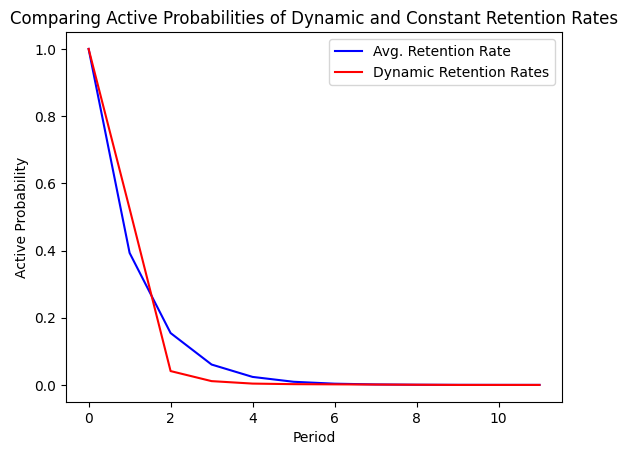

In [7]:
#5-c

import matplotlib.pyplot as plt

periods = list(range(12))

plt.plot(periods, survival_prob_cohort_0_avg, color='blue', label='Avg. Retention Rate')
plt.plot(periods, survival_prob_cohort_0_dynamic, color='red', label='Dynamic Retention Rates')

# Add a legend
plt.legend()

# Add labels and a title
plt.xlabel('Period')
plt.ylabel('Active Probability')
plt.title('Comparing Active Probabilities of Dynamic and Constant Retention Rates')

# Display the plot
plt.show()